# Week 4
## Exercise 1
1) Now, explain in your own words: what are regular expressions?
- A regular expression is a way of expressing a search of a string inside in string

In [1]:
import re
with open("socialgraphs2018/files/test.txt") as f:
    string = str(f.readlines())
match = re.search(u'\d\d\d\d', string)
if match:
    print 'found', match.group() ## 'found word:cat'
else:
    print 'did not find'

found 1234


In [2]:
match = re.findall(r'\[\[(.+?)]]', string)
if match:
    print 'found', match ## 'found word:cat'
else:
    print 'did not find'

found ['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']


In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## Part A

In [4]:
H113 = pd.read_csv("socialgraphs2018/files/data_US_congress/H113.csv")
H113["congressnumber"] = 113
H114 =pd.read_csv("socialgraphs2018/files/data_US_congress/H114.csv")
H114["congressnumber"] = 114
H115 = pd.read_csv("socialgraphs2018/files/data_US_congress/H115.csv")
H115["congressnumber"] = 115

In [5]:
allmembers = pd.concat([H113,H114,H115]).reset_index(drop=True) 

In [6]:
groups = allmembers.groupby("WikiPageName")

In [7]:
for key, group in groups:
    print group
    break;

     WikiPageName       Party     State  congressnumber
260  Aaron_Schock  Republican  Illinois             113
660  Aaron_Schock  Republican  Illinois             114


In [8]:
time_in_groups = groups.size().sort_values()

In [9]:
result = time_in_groups.groupby(time_in_groups).size()

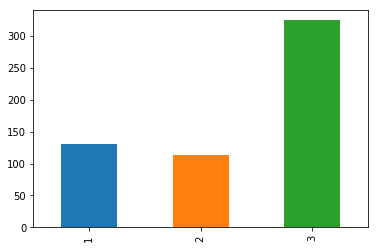

In [10]:
result.plot('bar')
plt.show()

In [11]:
elected=allmembers.groupby("congressnumber")

In [12]:
electedsize=elected.size().sort_values()
print electedsize

congressnumber
114    442
113    444
115    445
dtype: int64


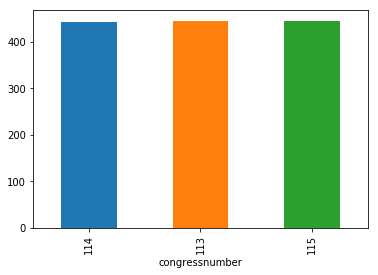

In [13]:
electedsize.plot("bar")

In [14]:
state = allmembers.groupby("State")

In [15]:
statesize=state.size().sort_values()

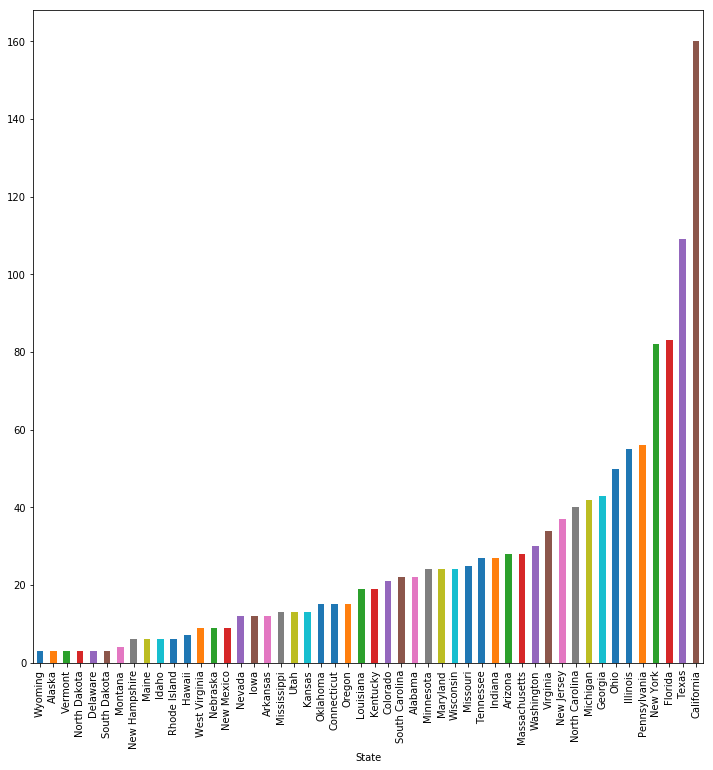

In [16]:
fig = plt.figure(figsize=(12, 12))
statesize.plot("bar")
plt.show()

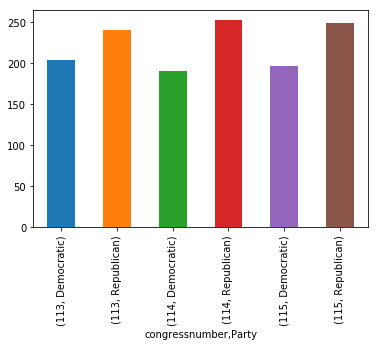

In [17]:
parties = allmembers.groupby(["congressnumber","Party"]).size()
parties.plot("bar",label="Democratic")
plt.show()

## Part B

In [18]:
import urllib2
import json
import networkx as nx

In [63]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2015-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision
wikiresponse = {}
for member in H113["WikiPageName"].unique():
    title = "titles="+member
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
    file = open("H113/"+member,"w")
    wikisource = urllib2.urlopen(query)
    file.write(wikisource.read())
    file.close()
    query2 = "%s%s&list=backlinks&bltitle=%s&bllimit=max&blfilterredir=redirects&format=json" % (baseurl,action,member)
    file = open("H113/"+member+"_redirects.json","w")
    wikisource2 = urllib2.urlopen(query2)
    json.dump(json.load(wikisource2), file)
    file.close()

In [64]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2017-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision
wikiresponse = {}
for member in H114["WikiPageName"].unique():
    title = "titles="+member
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
    file = open("H114/"+member,"w")
    wikisource = urllib2.urlopen(query)
    file.write(wikisource.read())
    file.close()
    query2 = "%s%s&list=backlinks&bltitle=%s&bllimit=max&blfilterredir=redirects&format=json" % (baseurl,action,member)
    file = open("H114/"+member+"_redirects.json","w")
    wikisource2 = urllib2.urlopen(query2)
    json.dump(json.load(wikisource2), file)
    file.close()

In [ ]:
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions"
rvprop ="rvprop=timestamp|content"
dataformat = "format=json"
rvdir = "rvdir=older" #sort revisions from newest to oldest
start = "rvend=2000-01-03T00:00:00Z" #start of my time period
end = "rvstart=2019-01-03T00:00:00Z" #end of my time period
limit = "rvlimit=1" #consider only the first revision
wikiresponse = {}
for member in H115["WikiPageName"].unique():
    title = "titles="+member
    query = "%s%s&%s&%s&%s&%s&%s&%s&%s&%s" % (baseurl, action, title, content, rvprop, dataformat, rvdir, end, start, limit)
    file = open("H115/"+member,"w")
    wikisource = urllib2.urlopen(query)
    file.write(wikisource.read())
    file.close()
    query2 = "%s%s&list=backlinks&bltitle=%s&bllimit=max&blfilterredir=redirects&format=json" % (baseurl,action,member)
    file = open("H115/"+member+"_redirects.json","w")
    wikisource2 = urllib2.urlopen(query2)
    json.dump(json.load(wikisource2), file)
    file.close()

## Part C

In [65]:
G = nx.DiGraph()
members = H113["WikiPageName"].unique()
for idx,member in enumerate(members):
    members[idx] = member.replace("_", " ")
G.add_nodes_from(members)
members_redirect = []
for member in members:
    string = member.replace(" ", "_")
    file = open("H113/"+string+"_redirects.json","r")
    #strings = file.readlines()[0]
    data =  json.load(file)
    members_redirect.append([member, [item["title"] for item in data["query"]["backlinks"]]])
for member in members:
    string = member.replace(" ", "_")
    with open("H113/"+string) as f:
        string = str(f.readlines())
    match = re.findall(r'\[\[(.+?)]]', string)
    matchlink = list(set(match).intersection(members))
    linklist = [(member,link) for link in matchlink]
    for item in members_redirect:
        matchlink = list(set(match).intersection(item[1]))
        if matchlink == []:
            pass
        else:
            linklist.append((member,item[0]))
    G.add_edges_from(linklist)

In [66]:
G.number_of_edges()

1482

In [67]:
G.number_of_nodes()

444

In [68]:
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

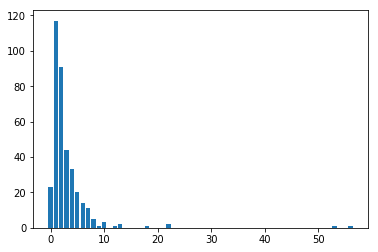

In [81]:
itera = list(range(min(in_degree.values()),max(in_degree.values())+1))
newitera = [x+1 for x in itera]
hist = np.histogram(in_degree.values(),bins=newitera)
plt.bar(list(range(min(in_degree.values()),max(in_degree.values()))),hist[0],align='center')
plt.show()

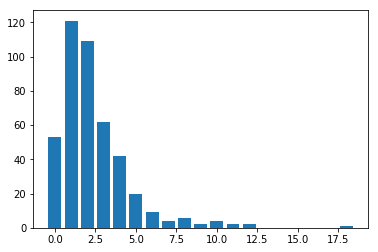

In [83]:
itera = list(range(min(out_degree.values()),max(out_degree.values())+1))
newitera = [x+0.5 for x in itera]
hist = np.histogram(out_degree.values(),bins=newitera)
plt.bar(list(range(min(out_degree.values()),max(out_degree.values()))),hist[0],align='center')
plt.show()

In [80]:
#Defining functions to plot against a random network and a scale free network
def PoissDegree(ks,avg):
    return [np.exp(-avg)*avg**k/math.factorial(int(k)) for k in ks]
def ScaleFreeDegree(ks,gamma):
    return [k**(-gamma)/zeta(gamma) for k in ks]

In [ ]:
#Plotting the in-degree distribution
itera = list(range(min(in_degree),max(in_degree)+1))
newitera = [x+1 for x in itera]
hist = np.histogram(in_degree,bins=newitera,density=True)
fig = plt.figure(figsize=(8,6))
plt.title("Degree distributions in log-log scale")
plt.ylabel("$log(p_k)$")
plt.xlabel("$log(k)$")
plt.loglog(list(range(min(in_degree),max(in_degree))),hist[0],"*")#,align='center')
#Making variables from both random and scale-free network in relevant range
avg = np.mean(in_degree.values())
ks = np.linspace(1,60,60)
plt.loglog(ks,PoissDegree(ks,avg),"-",color="k")
plt.loglog(ks,ScaleFreeDegree(ks,2),"-",color="r")
plt.legend(["Observations","Random network degree distributon","Scale-free network degree distribution ($\gamma = 2$)"])
plt.show()

In [ ]:
fig = plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G,k=0.15,iterations=20)
nx.draw(G,pos,node_size=in_degree.values())
plt.show()

In [ ]:
link